In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [5]:
train=pd.read_csv(r'C:\Users\ehsan\Downloads\titanic\train.csv')

In [9]:
test=pd.read_csv(r"C:\Users\ehsan\Downloads\titanic\test.csv")

In [12]:
copy = pd.read_csv(r'C:\Users\ehsan\Downloads\titanic\train.csv')
id = copy["PassengerId"]

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
train.shape

(891, 12)

In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
age_train=train.iloc[:,5:6]
age_test=test.iloc[:,4:5]
fare_test = test.iloc[:,8:9]
imputer_median = SimpleImputer(missing_values=np.nan, strategy="median")
train.iloc[:,5:6] = imputer_median.fit_transform(age_train)
test.iloc[:,4:5] = imputer_median.fit_transform(age_test)
train.iloc[:,-1:].fillna(train.iloc[:,-1:].mode(), inplace = True)

test['Fare'].fillna(test['Fare'].median(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
id = test["PassengerId"]
drop = ["Cabin","Ticket","PassengerId","Name"]
train.drop(drop,axis=1, inplace = True)
test.drop(drop,axis=1, inplace = True)

In [23]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [27]:
y = train["Survived"]
train.drop("Survived", inplace=True,axis=1)

In [28]:
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

train["Sex"] = le.fit_transform(train["Sex"])
train["Embarked"] = le.fit_transform(train["Embarked"])
test["Sex"] = le.fit_transform(test["Sex"])
test["Embarked"] = le.fit_transform(test["Embarked"])

In [29]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [30]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


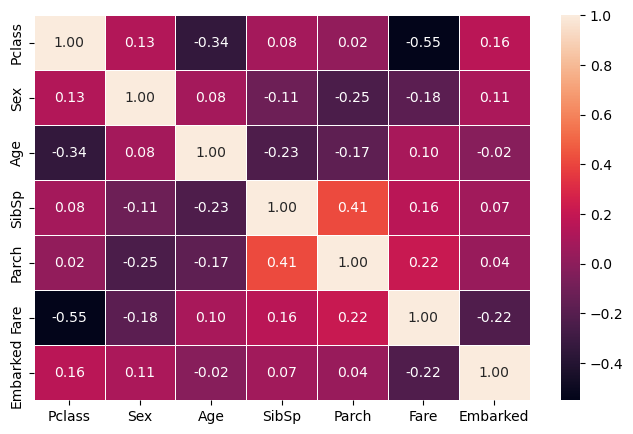

In [31]:
f,ax=plt.subplots(figsize = (8,5))
sns.heatmap(train.corr(), annot = True, fmt = ".2f", linewidths = .5,ax=ax)
plt.show()

In [33]:
train.drop("Parch", axis=1,inplace = True)
test.drop("Parch", axis=1, inplace = True)
train.drop("SibSp", axis=1,inplace = True)
test.drop("SibSp", axis=1, inplace = True)

In [34]:
sc=StandardScaler()

train = sc.fit_transform(train)
test = sc.transform(test)
train=pd.DataFrame(train)
test=pd.DataFrame(test)

In [35]:
train.head()

,0,1,2,3,4
0,0.827377,0.737695,-0.565736,-0.502445,0.585954
1,-1.566107,-1.355574,0.663861,0.786845,-1.942303
2,0.827377,-1.355574,-0.258337,-0.488854,0.585954
3,-1.566107,-1.355574,0.433312,0.420730,0.585954
4,0.827377,0.737695,0.433312,-0.486337,0.585954


In [36]:
test.head()

,0,1,2,3,4
0,0.827377,0.737695,0.394887,-0.490783,-0.678175
1,0.827377,-1.355574,1.355510,-0.507479,0.585954
2,-0.369365,0.737695,2.508257,-0.453367,-0.678175
3,0.827377,0.737695,-0.181487,-0.474005,0.585954
4,0.827377,-1.355574,-0.565736,-0.401017,0.585954


In [37]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Logistic Regression

In [40]:
log_r= LogisticRegression(random_state=0)
log_r.fit(train,y)
y_pred = log_r.predict(test)
log_acc = round(log_r.score(train, y) * 100, 2)
print("accuracy of logistic regression:",log_acc)

accuracy of logistic regression: 79.01


The best cv value: 10


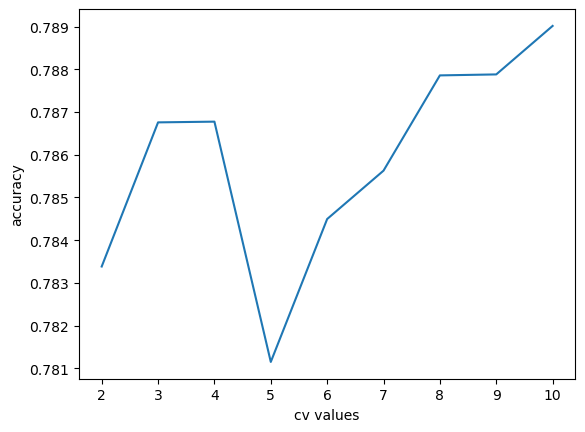

In [41]:
scores = []
for cv in range(2, 11):
        log_r_set =LogisticRegression()
        accuracies = cross_val_score(estimator=log_r_set, X=train,y=y, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)
    
plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [42]:
accuracies = cross_val_score(log_r_set, X=train,y=y, cv=10)
lr_score=np.mean(accuracies)
print("Cross Validation accuracy score:", lr_score)

Cross Validation accuracy score: 0.7890137328339575


## KNN

In [43]:
#best parameters
knn = KNeighborsClassifier()
knn.fit(train, y)
scores=[]

p=[{'n_neighbors':[1,2,3,4,6,5,7,8,9,10],'metric':['minkowski']}]

gs= GridSearchCV(estimator = knn,
                 param_grid=p,
                 scoring="accuracy",
                 cv=10,
                 n_jobs=-1)

grid_search = gs.fit(train,y)

best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("{}->{}".format("best score", best_score))
print("{}->{}".format("best parameters", best_parameters))

best score->0.8148689138576779
best parameters->{'metric': 'minkowski', 'n_neighbors': 5}


In [44]:
knn = KNeighborsClassifier(n_neighbors = 5, metric="minkowski")
knn.fit(train, y)
y_pred=knn.predict(test)
knn_acc = round(knn.score(train, y) * 100, 2)
print("{} nn score -> {}".format(5,knn_acc))

5 nn score -> 86.64


The best cv value: 10


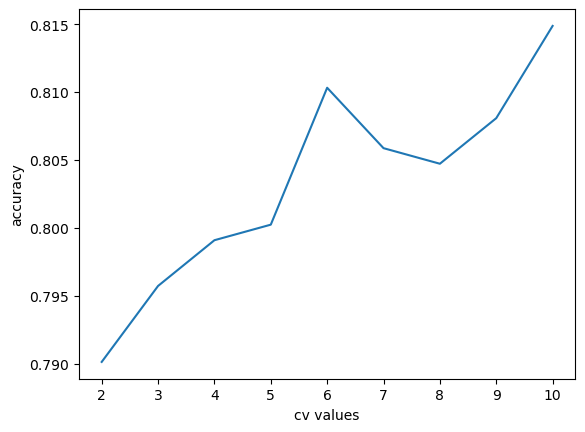

In [45]:
scores = []
for cv in range(2, 11):
        knn_set = KNeighborsClassifier(n_neighbors = 5, metric="minkowski")
        accuracies = cross_val_score(estimator=knn_set, X=train,y=y, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)
    
plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [46]:
 accuracies = cross_val_score(knn_set, X=train,y=y, cv=10)
knn_score = np.mean(accuracies)
print("cross validation accuracy score:", knn_score)

cross validation accuracy score: 0.8148689138576779


## Support Vector Machine Classification


In [47]:
linear_svm=SVC(kernel="linear")
linear_svm.fit(train,y)
y_pred = linear_svm.predict(test)
linear_acc = round(linear_svm.score(train, y) * 100, 2)
print("accuracy of linear SVC:",linear_acc)

accuracy of linear SVC: 78.68


In [48]:
poly_svm=SVC(kernel="poly")
poly_svm.fit(train,y)
y_pred = poly_svm.predict(test)
poly_acc = round(poly_svm.score(train, y) * 100, 2)
print("accuracy of poly SVC:",poly_acc)

accuracy of poly SVC: 82.94


In [49]:
rbf_svm=SVC(kernel="rbf")
rbf_svm.fit(train,y)
y_pred = rbf_svm.predict(test)
rbf_acc = round(rbf_svm.score(train, y) * 100, 2)
print("accuracy of rbf SVC:",rbf_acc)

accuracy of rbf SVC: 82.72


The best cv value: 10


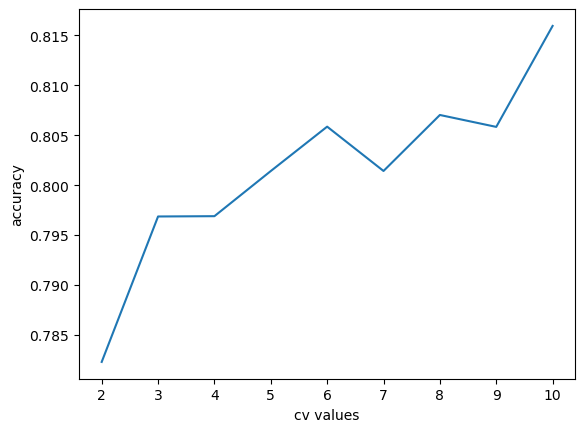

In [50]:
scores = []
for cv in range(2, 11):
        poly_svm=SVC(kernel="poly")
        accuracies = cross_val_score(estimator=poly_svm, X=train,y=y, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)
    
plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [51]:
accuracies = cross_val_score(estimator=poly_svm, X=train,y=y, cv=10)
svc_score = np.mean(accuracies)
print("cross validation accuracy score:", svc_score)

cross validation accuracy score: 0.8159550561797753


## Naive Bayes Classification

In [52]:
  nb=GaussianNB()
nb.fit(train,y)
y_pred = nb.predict(test)
nb_acc = round(nb.score(train, y) * 100, 2)
print("accuracy of naive bayes:",nb_acc)

accuracy of naive bayes: 78.34


The best cv value: 5


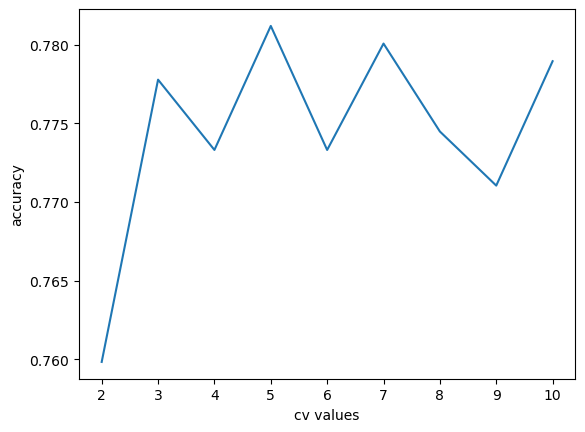

In [53]:
#cross-validation

scores = []
for cv in range(2, 11):
        nb=GaussianNB()
        accuracies = cross_val_score(estimator=nb, X=train,y=y, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)
    
plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [54]:
accuracies = cross_val_score(estimator=nb, X=train,y=y, cv=5)
nb_score = np.mean(accuracies)
print("cross validation accuracy score:", nb_score)

cross validation accuracy score: 0.7811938986880923


## Decision Tree

In [55]:
dct = DecisionTreeClassifier(criterion="entropy")
dct.fit(train,y)
y_pred = dct.predict(test)
dct_acc = round(dct.score(train, y) * 100, 2)
print('{}-> {}'.format("Accuracy of Decision Tree Classifier ",dct_acc))

Accuracy of Decision Tree Classifier -> 97.76


The best cv value: 10


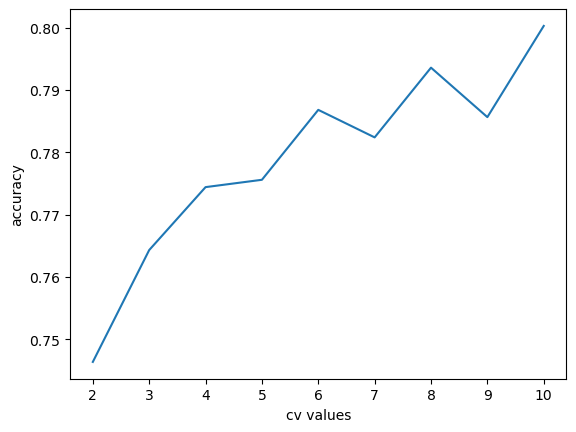

In [56]:
scores = []
for cv in range(2, 11):
        dct = DecisionTreeClassifier(criterion="entropy")
        accuracies = cross_val_score(estimator=dct, X=train,y=y, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)
    
plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [57]:
accuracies = cross_val_score(estimator=dct, X=train,y=y, cv=10)
dct_score = np.mean(accuracies)
print("cross validation accuracy score:", dct_score)

cross validation accuracy score: 0.7946317103620475


## Random Forest

The best n_estimators parameter is:  49


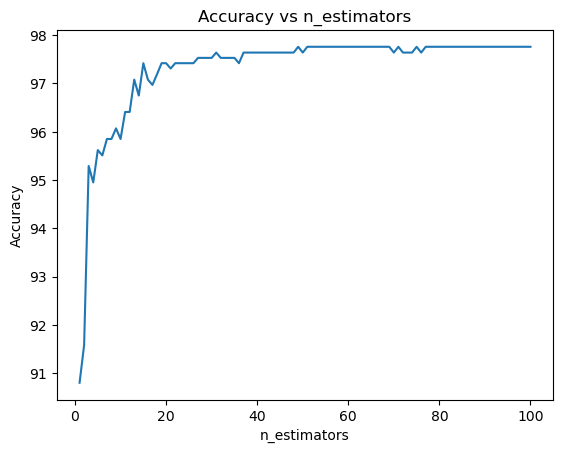

In [58]:
#best parameters

n_estimators_list = list(range(1, 101))
scores = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(train, y)
    y_pred = rf.predict(test)
    rf_acc = round(rf.score(train, y) * 100, 2)
    scores.append(rf_acc)

best_n_estimators=np.argmax(scores)+1
print("The best n_estimators parameter is: ", best_n_estimators)

plt.plot(n_estimators_list, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators')
plt.show()

In [59]:
rf = RandomForestClassifier(n_estimators=49, random_state=42)
rf.fit(train, y)
y_pred = rf.predict(test)
rf_acc = round(rf.score(train,y) * 100,2) 
print('{}-> {}'.format("Accuracy of Random Forest Classifier ",rf_acc))

Accuracy of Random Forest Classifier -> 97.76


The best cv value: 9


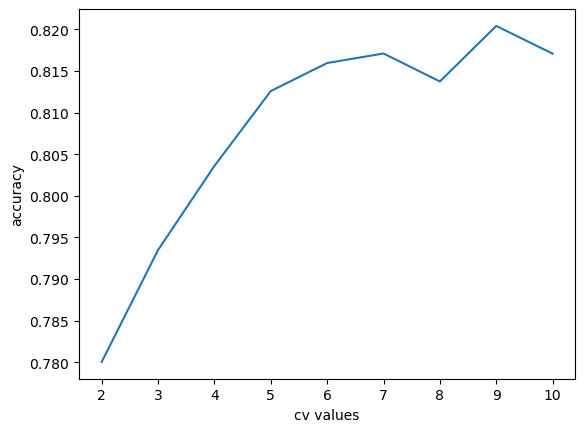

In [60]:
#cross-validation

scores = []
for cv in range(2, 11):
        rf = RandomForestClassifier(n_estimators=49, random_state=42)
        accuracies = cross_val_score(estimator=rf, X=train,y=y, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)
    
plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [61]:
rf = RandomForestClassifier(n_estimators=49, random_state=42)
accuracies = cross_val_score(estimator=rf, X=train,y=y, cv=9)
rf_score = np.mean(accuracies)
print("{}-> {}".format("Cross validation accuracy: ",rf_score))

Cross validation accuracy: -> 0.8204264870931537


In [62]:
accuracy_scores = [log_acc,knn_acc,linear_acc,nb_acc,dct_acc,rf_acc]
cross_acc= [lr_score,knn_score,svc_score,nb_score,dct_score,rf_score]
models = ["Logistic Regression","KNN","SVC","Naive Bayes","Decision Tree","Random Forest"]

for i in range(0,6):
    print("------------")
    print(models[i])
    accuracy_scores[i] = accuracy_scores[i]
    cross_acc[i] = round(cross_acc[i]*100,2)
    print("{}->{}".format("Accuracy Score ",accuracy_scores[i]))
    print("{}->{}".format("Cross-Validation Score ",cross_acc[i]))

------------
Logistic Regression
Accuracy Score ->79.01
Cross-Validation Score ->78.9
------------
KNN
Accuracy Score ->86.64
Cross-Validation Score ->81.49
------------
SVC
Accuracy Score ->78.68
Cross-Validation Score ->81.6
------------
Naive Bayes
Accuracy Score ->78.34
Cross-Validation Score ->78.12
------------
Decision Tree
Accuracy Score ->97.76
Cross-Validation Score ->79.46
------------
Random Forest
Accuracy Score ->97.76
Cross-Validation Score ->82.04


Text(0.5, 1.0, 'Cross-Validation Values of Models')

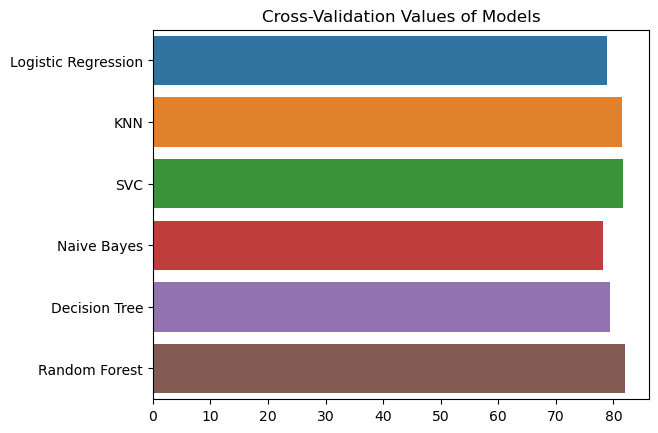

In [63]:
sns.barplot(x=cross_acc, y=models)
plt.title("Cross-Validation Values of Models")

In [64]:
model = RandomForestClassifier(n_estimators=49, random_state=42)
model.fit(train, y)
y_pred = model.predict(test)

output = pd.DataFrame({'PassengerId': id, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
print("Our submission was successfully saved!")

Our submission was successfully saved!
